In [4]:
import numpy as np

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [6]:
import sklearn

In [7]:
filename = "qc-targets.csv"
qcTargets = pd.read_csv(filename,index_col=0) 
qcTargets

,rule_id,inchikey,chembl_id,predicate_id,ref_id,compound_id,object_id,object_external_id,object_name,predicate_name,ref_name
0,7363,LNEPOXFFQSENCJ-UHFFFAOYSA-N,CHEMBL54,18,22,126,198,BE0000756,D(2) dopamine receptor,antagonist,drugbank:targets:human
1,117580,LNEPOXFFQSENCJ-UHFFFAOYSA-N,CHEMBL54,69,47,126,5468,CHEMBL224,Serotonin 2a (5-HT2a) receptor,antagonist,chembl:mechs
2,117581,LNEPOXFFQSENCJ-UHFFFAOYSA-N,CHEMBL54,76,47,126,5626,CHEMBL2331075,D2-like dopamine receptor,inverse agonist,chembl:mechs
3,150244,LNEPOXFFQSENCJ-UHFFFAOYSA-N,CHEMBL54,110,160,126,8622,Peroxisome proliferator-activated receptor (PP...,Peroxisome proliferator-activated receptor (PP...,targets,libraries:prestwick:targets
4,7215,QZUDBNBUXVUHMW-UHFFFAOYSA-N,CHEMBL42,18,22,162,198,BE0000756,D(2) dopamine receptor,antagonist,drugbank:targets:human
5,7216,QZUDBNBUXVUHMW-UHFFFAOYSA-N,CHEMBL42,18,22,162,199,BE0000451,5-hydroxytryptamine receptor 2A,antagonist,drugbank:targets:human
6,117592,QZUDBNBUXVUHMW-UHFFFAOYSA-N,CHEMBL42,69,47,162,5468,CHEMBL224,Serotonin 2a (5-HT2a) receptor,antagonist,chembl:mechs
7,117593,QZUDBNBUXVUHMW-UHFFFAOYSA-N,CHEMBL42,69,47,162,5518,CHEMBL217,Dopamine D2 receptor,antagonist,chembl:mechs
8,130609,QZUDBNBUXVUHMW-UHFFFAOYSA-N,CHEMBL42,89,132,162,5577,CHEMBL339,Dopamine D2 receptor,reported_activity,chembl:activity
9,130610,QZUDBNBUXVUHMW-UHFFFAOYSA-N,CHEMBL42,89,132,162,5466,CHEMBL273,Serotonin 1a (5-HT1a) receptor,reported_activity,chembl:activity


In [9]:
qc_cd = pd.read_csv('data/qc-cd10.csv.gz', compression='gzip')
qc_cd

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,name,pack,display_name,well,well_index,row,column,well_label,run,submission,...,102010,102011,102012,102013,102014,102015,102016,102017,102018,102019
0,r7330: killed (+): Eugenol [c13576] (200µM),NaN,609812,609812,2,1,2,A02,7330,a641731ce04f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,r7331: killed (+): Eugenol [c13576] (200µM),NaN,609908,609908,2,1,2,A02,7331,570fc53f11c2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,r7329: killed (+): Eugenol [c13576] (200µM),NaN,609717,609717,3,1,3,A03,7329,cdfd5046deaf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,r7521: killed (+): Eugenol [c13576] (200µM),NaN,631270,631270,4,1,4,A04,7521,0e4e61345af5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,r7329: killed (+): Eugenol [c13576] (200µM),NaN,609720,609720,6,1,6,A06,7329,cdfd5046deaf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,r7107: killed (+): Eugenol [c13576] (200µM),NaN,595583,595583,7,1,7,A07,7107,3ebbb658fa1a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,r7519: killed (+): Eugenol [c13576] (200µM),NaN,631081,631081,7,1,7,A07,7519,fdb3181c0113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,r7112: killed (+): Eugenol [c13576] (200µM),NaN,596063,596063,7,1,7,A07,7112,f77eb325fa0b,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,r7522: killed (+): Eugenol [c13576] (200µM),NaN,631369,631369,7,1,7,A07,7522,b1995b85679f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,r7350: killed (+): Eugenol [c13576] (200µM),NaN,611545,611545,7,1,7,A07,7350,7e1cb8e50291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
qc_cd10 = qc_cd

In [86]:
qc_cd10.shape

(1440, 102058)

In [13]:
pattern = re.compile('\\(([0-9]+),.*')
qc_cd10['c_ids'] = qc_cd10['c_ids'].map(lambda r: int(pattern.match(r).group(1)) if pattern.match(r) is not None else 0)

valid_compounds = qcTargets['compound_id'].unique()
v = qc_cd10['c_ids'].unique()
qc = qc_cd10[qc_cd10['c_ids'].isin(valid_compounds)]
qc

,name,pack,display_name,well,well_index,row,column,well_label,run,submission,...,102010,102011,102012,102013,102014,102015,102016,102017,102018,102019
192,r7330: Haloperidol [c126] (25µM),NaN,609811,609811,1,1,1,A01,7330,a641731ce04f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,r7329: Haloperidol [c126] (25µM),NaN,609716,609716,2,1,2,A02,7329,cdfd5046deaf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,r7519: Haloperidol [c126] (25µM),NaN,631077,631077,3,1,3,A03,7519,fdb3181c0113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,r7329: Haloperidol [c126] (25µM),NaN,609718,609718,4,1,4,A04,7329,cdfd5046deaf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,r7349: Haloperidol [c126] (25µM),NaN,611447,611447,5,1,5,A05,7349,b940fa622ba6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,r7330: Haloperidol [c126] (25µM),NaN,609816,609816,6,1,6,A06,7330,a641731ce04f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,r7331: Haloperidol [c126] (25µM),NaN,609912,609912,6,1,6,A06,7331,570fc53f11c2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,r7348: Haloperidol [c126] (25µM),NaN,611352,611352,6,1,6,A06,7348,0f3895f51be7,...,11.0,11.0,29.0,7.0,42.0,0.0,24.0,2.0,0.0,0.0
200,r7349: Haloperidol [c126] (25µM),NaN,611448,611448,6,1,6,A06,7349,b940fa622ba6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,r7107: Haloperidol [c126] (25µM),NaN,595586,595586,10,1,10,A10,7107,3ebbb658fa1a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#qcTargets.set_index('compound_id')[['']] 
d = qcTargets[qcTargets["ref_name"] == "chembl:mechs"]
d["object_name"].unique()


array(['Serotonin 2a (5-HT2a) receptor', 'D2-like dopamine receptor',
       'Dopamine D2 receptor', 'Sodium channel alpha subunit'],
      dtype=object)

In [15]:
MI = []
targets = []
MI_test = []
targets_test = []
for i, rows in qc.iterrows():
    ID = rows.c_ids
    #print(rows)
    target = qcTargets.loc[(qcTargets["compound_id"] == ID)]
    target = target.loc[target["ref_name"] == "chembl:mechs"]
    target = target.values.tolist()
    if len(target)!=0:
        receptors = []
        for i in target:
            receptors.append(i[8])
        #print(receptors)
        finalTargets = np.zeros(4)
        for x in receptors:
            if "alpha" in x:
                finalTargets[0] = 1
            if "D2-like dopamine receptor" in x:
                finalTargets[1] = 1
            if "Dopamine D2 receptor" in x:
                finalTargets[2] = 1
            if "Serotonin" in x:
                finalTargets[3] = 1
        finalTargets = finalTargets.tolist()
        motionIndex = []
        m = rows.iloc[-102019:]
        m = m.values.tolist()
        if rows.run == 7522:
            MI_test.append(m)
            targets_test.append(finalTargets)
        else:
            targets.append(finalTargets)
            MI.append(m)
  
        

In [16]:
print(len(MI))
print(len(MI_test))
print(len(targets))
print(len(targets_test))

312
24
312
24


In [17]:
MI = np.array(MI)
targets = np.array(targets)
MI_test = np.array(MI_test)
targets_test = np.array(targets_test)


In [18]:
newTargets = []
for i in targets:
    if np.all(i == [0.0, 1.0, 0.0, 1.0]):
        newTargets.append(0)
    if np.all(i == [0.0, 0.0, 1.0, 1.0]):
        newTargets.append(1)
    if np.all(i == [0.0, 1.0, 0.0, 0.0]):
        newTargets.append(2)
    if np.all(i == [1.0, 0.0, 0.0, 0.0]):
        newTargets.append(3)
newTargets = np.array(newTargets)
targets = newTargets
print(targets)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [19]:
newTargets2 = []
for i in targets_test:
    if np.all(i == [0.0, 1.0, 0.0, 1.0]):
        newTargets2.append(0)
    if np.all(i == [0.0, 0.0, 1.0, 1.0]):
        newTargets2.append(1)
    if np.all(i == [0.0, 1.0, 0.0, 0.0]):
        newTargets2.append(2)
    if np.all(i == [1.0, 0.0, 0.0, 0.0]):
        newTargets2.append(3)
newTargets2 = np.array(newTargets2)
targets_test = newTargets2
print(targets_test)

[0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3]


In [20]:
import math
newMI = []
for i, j in enumerate(MI):
    new = j[:101999]
    newMI.append(new)

newMI2 = []
for i, j in enumerate(MI_test):
    new = j[:101999]
    newMI2.append(new)
    
# for i in newMI:
#     for j in i:
#         if math.isnan(j) == True:
#             print(j)

MI = np.array(newMI)
MI_test = np.array(newMI2)

In [21]:
d = qc["run"].unique()
d

array([7330, 7329, 7519, 7349, 7331, 7348, 7107, 7350, 7521, 7473, 7112,
       7522, 7327, 7106])

In [22]:
MI_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [30.,  6.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ..., 39., 38., 37.],
       [ 0.,  0.,  0., ...,  3.,  0.,  1.]])

In [23]:
np.random.seed(10) # set a random seed to make this reproducible 
random_order = np.random.permutation(len(MI)) # gets a new order for the dataset

# |with_ex| is the number of test examples
# Precondition: with_ex < 0
with_ex = -64

MI_train = MI[random_order[:with_ex]]
targets_train = targets[random_order[:with_ex]]

MI_validate = MI[random_order[with_ex:]]
targets_validate = targets[random_order[with_ex:]]


In [24]:
#SVM model 
from sklearn import svm

model = svm.LinearSVC()
model.fit(MI_train, targets_train)
svmPreds = model.predict(MI_validate)

In [25]:
# Classification accuracy

num_correct = 0
for i in range(len(svmPreds)):
    if svmPreds[i] == targets_validate[i]:
        num_correct += 1
    
print("The fraction of correctly classified examples in the test set is: " + str(num_correct / len(svmPreds)))

The fraction of correctly classified examples in the test set is: 0.328125


In [118]:
#Linear regression
from sklearn.linear_model import LinearRegression

modelLinear = LinearRegression()
modelLinear.fit(MI_train, targets_train)
linearPreds = modelLinear.predict(MI_validate)
print(linearPreds)

# Classification accuracy
num_correct = 0
for i in range(len(linearPreds)):
    if linearPreds[i] == targets_validate[i]:
        num_correct += 1
    
print("The fraction of correctly classified examples in the test set is: " + str(num_correct / len(linearPreds)))




[ 1.54504385  3.39036926  3.27500458 -0.01828373  0.73628754  2.19815828
  2.44320302  1.44469833  1.12654176  1.29396864  2.53567081  0.38701336
  1.08182935  1.55779294  2.04763831  3.10850342  2.40434833  0.65367778
  0.60532699  2.93030529  1.41955957  1.86163243  0.56409435 -0.49548191
  1.33694186  0.77861419  2.00655996  2.01862933  1.79450196  3.19681382
  2.26640378  1.37049145  0.86471764  0.84862015  2.01099494  1.79919413
  0.62644922  3.0636544   1.78421052  3.09925492  2.18570331  1.09643209
  2.02996377  1.48869932  1.47964108  0.60591416  1.75519581  0.44644511
  2.57343574  0.866581    0.75857709  1.5073526   2.7063067   3.19085706
  1.30640125  2.10131601  2.92082033  1.28638974  1.86221895  3.79109125
  0.99303528  0.52463204  2.80998596  1.28402756]
The fraction of correctly classified examples in the test set is: 0.0


In [26]:
from sklearn.ensemble import RandomForestClassifier

classifier2 = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_depth = 5)
classifier2 = classifier2.fit(MI_train, targets_train)
y_predict = classifier2.predict(MI_validate)
classifier2.score(MI_validate, targets_validate)

0.46875

In [76]:
#sklearn mlp
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(200, 300), max_iter=50, alpha=1e-4,
                    solver="adam", verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.01, activation = "relu")

In [77]:
model.fit(MI_train, targets_train)

Iteration 1, loss = 16.58223199
Iteration 2, loss = 16.84313514
Iteration 3, loss = 17.36689549
Iteration 4, loss = 12.36747979
Iteration 5, loss = 2.06020692
Iteration 6, loss = 1.53429967
Iteration 7, loss = 1.44147448
Iteration 8, loss = 1.62615032
Iteration 9, loss = 1.62438316
Iteration 10, loss = 1.53738600
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 300), learning_rate='constant',
       learning_rate_init=0.01, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [78]:
Preds = model.predict(MI_validate)
# Compute number of examples classified correctly

num_correct = 0
for i in range(len(Preds)):
    if Preds[i] == targets_validate[i]:
        num_correct += 1
 
    
print("The fraction of correctly classified examples in the validation set is: " + str(num_correct / len(Preds)))

The fraction of correctly classified examples in the validation set is: 0.3125


In [61]:
#SVM confusion matrix

from sklearn import metrics

print("Confusion matrix:\n%s" % metrics.confusion_matrix(targets_validate, Preds))

Confusion matrix:
[[18  0  0  0]
 [15  2  0  0]
 [12  0  0  0]
 [16  1  0  0]]


In [47]:
#Predicting compound from motion indexes
MI2 = []
compound = []
MI2_test = []
compound_test = []
oldID = 13576
counter = 1
for i, rows in qc_cd10.iterrows():
    ID = rows.c_ids
    motionIndex = []
    m = rows.iloc[-102019:]
    m = m.values.tolist()
    if rows.run == 7522:
        if ID == oldID:
            compound_test.append(counter)
        else:
            counter+=1
            compound_test.append(counter)
            oldID = ID
        MI2_test.append(m)
    else:
        if ID == oldID:
            compound.append(counter)
        else:
            counter+=1
            compound.append(counter)
            oldID = ID
        MI2.append(m)
    
    
    


    

In [58]:
print(MI2[0])

[  0.   0.   0. ...  50. 156. 245.]


In [49]:
import math
newMI = []
for i, j in enumerate(MI2):
    new = j[:101999]
    newMI.append(new)

newMI2 = []
for i, j in enumerate(MI2_test):
    new = j[:101999]
    newMI2.append(new)
    
# for i in newMI:
#     for j in i:
#         if math.isnan(j) == True:
#             print(j)

MI2 = np.array(newMI)
MI2_test = np.array(newMI2)

In [51]:
compound = np.array(compound)
compound_test = np.array(compound_test)

In [54]:
np.random.seed(10) # set a random seed to make this reproducible 
random_order = np.random.permutation(len(MI2)) # gets a new order for the dataset

# |with_ex| is the number of test examples
with_ex = -268

MI2_train = MI2[random_order[:with_ex]]
compound_train = compound[random_order[:with_ex]]

MI2_validate = MI2[random_order[with_ex:]]
compound_validate = compound[random_order[with_ex:]]

In [57]:
#SVM model 
from sklearn import svm

model = svm.LinearSVC()
model.fit(MI2_train, compound_train)
svmPreds = model.predict(MI2_validate)

In [59]:
# Classification accuracy

num_correct = 0
for i in range(len(svmPreds)):
    if svmPreds[i] == compound_validate[i]:
        num_correct += 1
    
print("The fraction of correctly classified examples in the test set is: " + str(num_correct / len(svmPreds)))

The fraction of correctly classified examples in the test set is: 0.20522388059701493


In [99]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10000, random_state = 1, n_jobs = 4)
classifier = classifier.fit(MI2_train, compound_train)
y_predict = classifier.predict(MI2_validate)
classifier.score(MI2_validate, compound_validate)

0.291044776119403

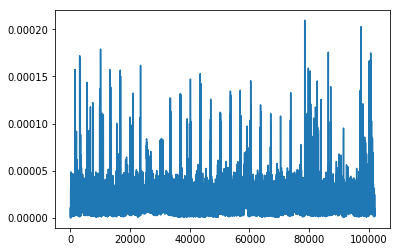

In [101]:
plt.plot(classifier.feature_importances_)

[0.00000000e+00 9.36993370e-06 1.09878997e-05 ... 6.30683293e-06
 4.44082670e-06 4.09067347e-06]


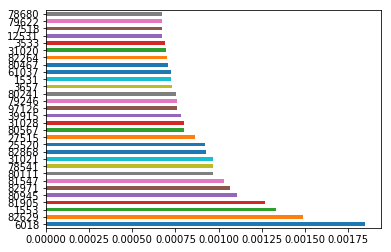

In [100]:
df = pd.DataFrame(MI2_train)

print(classifier.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(modelT.feature_importances_, index=df.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [109]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
MI2_train = pca.fit_transform(MI2_train)
MI2_validate = pca.transform(MI2_validate)

In [112]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, n_jobs = 4)
classifier = classifier.fit(MI2_train, compound_train)
y_predict = classifier.predict(MI2_validate)
classifier.score(MI2_validate, compound_validate)

0.2835820895522388